In [48]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import os
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.optimizers import Adam

In [49]:
%pip install librosa
import librosa

Note: you may need to restart the kernel to use updated packages.


## Visualizing audio data

In [51]:
test_file = 'metal.00000.wav'

C:\Users\Nemo\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\Nemo\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\Nemo\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


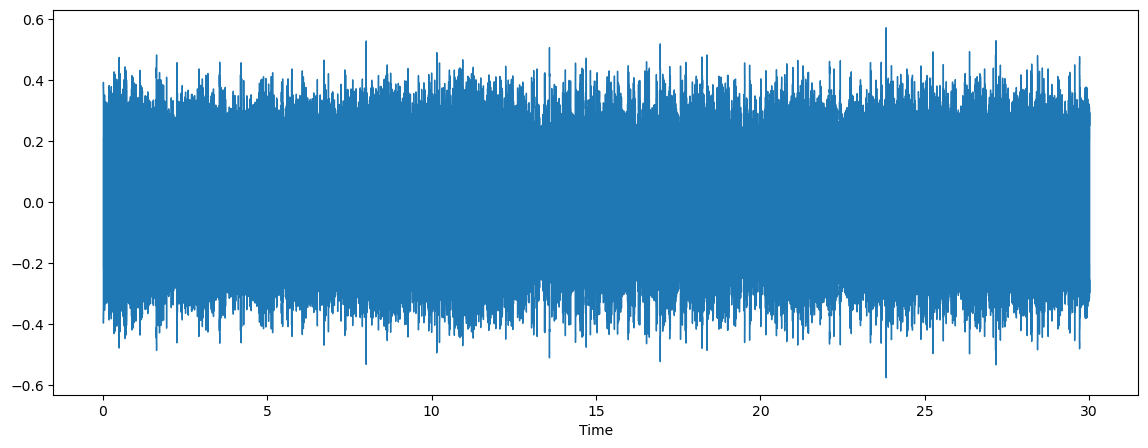

In [52]:
y,sr = librosa.load(test_file, sr=44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)

## Playing the audio file

In [54]:

from IPython.display import Audio
Audio(data=y, rate=sr)

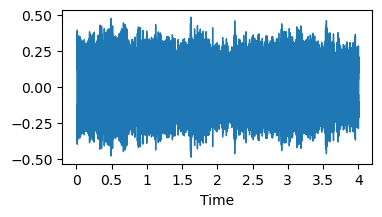

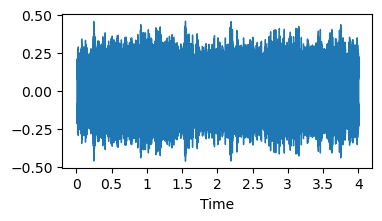

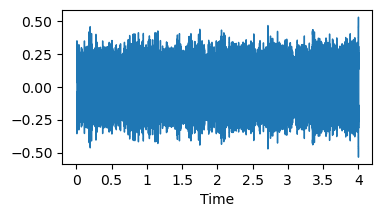

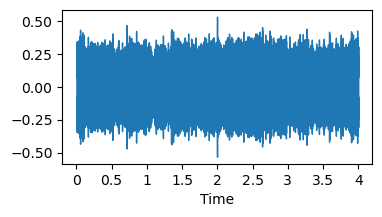

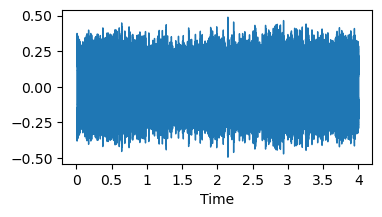

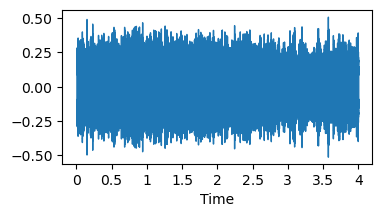

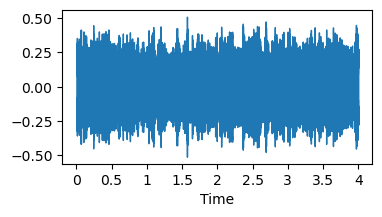

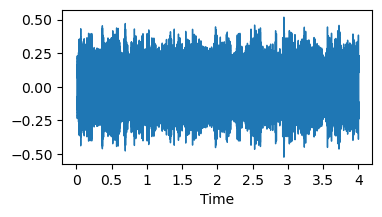

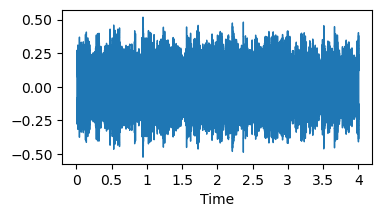

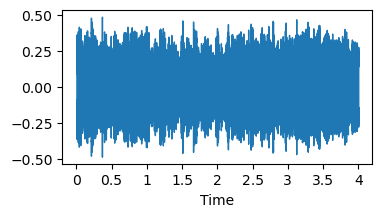

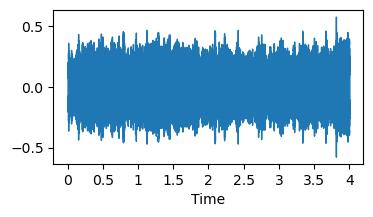

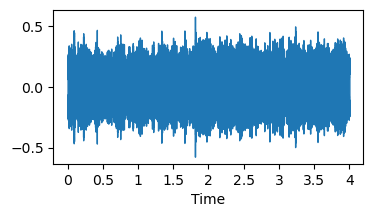

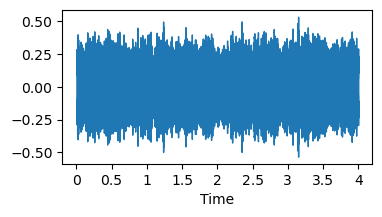

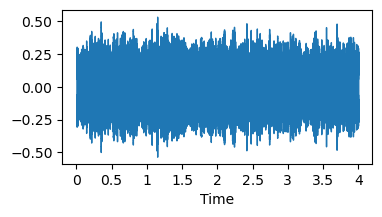

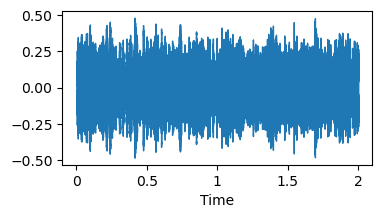

In [55]:
# defining duration and overlap
chunk_duration = 4
overlap_duration = 2

# converting duration to sample
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

# calculating the number of chunks
num_chunks = int(np.ceil( (len(y)-chunk_samples) / (chunk_samples-overlap_samples) )) +1

# iterating over chunks
for i in range(num_chunks):
  # calculate start and end indices of the chunk
  start = i * (chunk_samples - overlap_samples)
  end = start + chunk_samples

  # extracting chunk audio
  chunk = y[start:end]
  plt.figure(figsize=(4,2))
  librosa.display.waveshow(chunk, sr=sr)
  plt.show()

## Melspectrogram Visualization

In [57]:
# Plotting melspectrogram using function
def plot_melspectrogram(y,sr):
  # computing spectrogram
  spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

  # convert to decibels (logscale)
  spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

  # visualizing the spectrogram
  plt.figure(figsize=(10,4))
  librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
  plt.colorbar(format='%2.0f dB')
  plt.title("Spectrogram")
  plt.tight_layout()
  plt.show()

## Visualizing test file melspectrogram

In [59]:
test_file = 'metal.00000.wav'
y,sr = librosa.load(test_file, sr=44100)

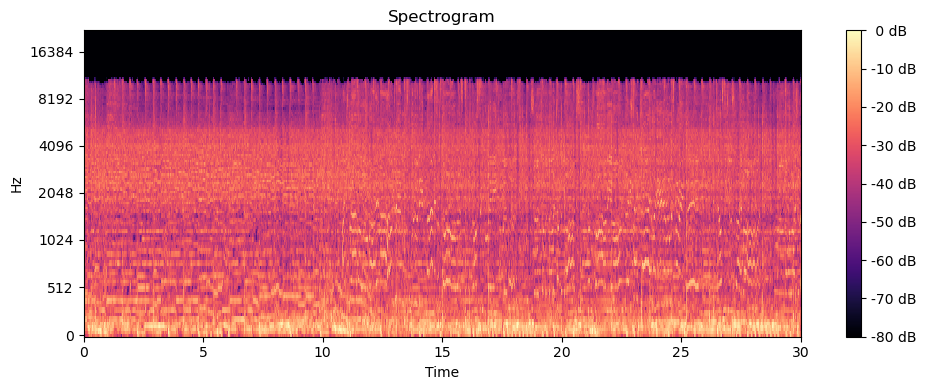

In [60]:
plot_melspectrogram(y,sr)

In [61]:
def plot_melspectrogram_chunks(y,sr):
	# define the duration of each chunk and overlap
	chunk_duration = 4
	overlap_duration = 2

	# convert duration to sample
	chunk_samples = chunk_duration * sr
	overlap_samples = overlap_duration * sr

	# calculate the number of chunks
	num_chunks = int(np.ceil( (len(y)-chunk_samples)/(chunk_samples-overlap_samples) )) + 1

	# iterate over each chunk
	for i in range(num_chunks):
		# Calculate start and end of indices of chunk
		start = i*(chunk_samples-overlap_samples)
		end = start+chunk_samples

		# Extract the chunk audio
		chunk = y[start:end]

		# melspectrogram plot
		spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
		print(spectrogram.shape)
		spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
		# visualizing
		plt.figure(figsize=(10,4))
		librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
		plt.colorbar(format='%2.0f dB')
		plt.title("Spectrogram")
		plt.tight_layout()
plt.show()

In [62]:
test_file = 'metal.00000.wav'
y,sr = librosa.load(test_file, sr=44100)

(128, 345)
(128, 345)
(128, 345)
(128, 345)
(128, 345)
(128, 345)
(128, 345)
(128, 345)
(128, 345)
(128, 345)
(128, 345)
(128, 345)
(128, 345)
(128, 345)
(128, 173)


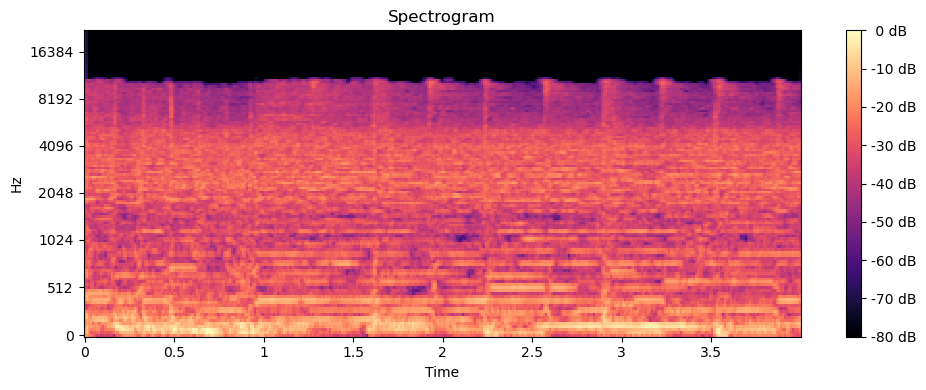

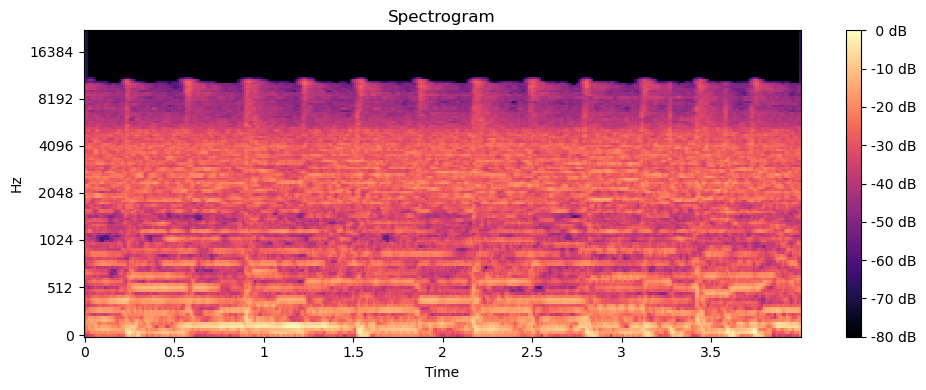

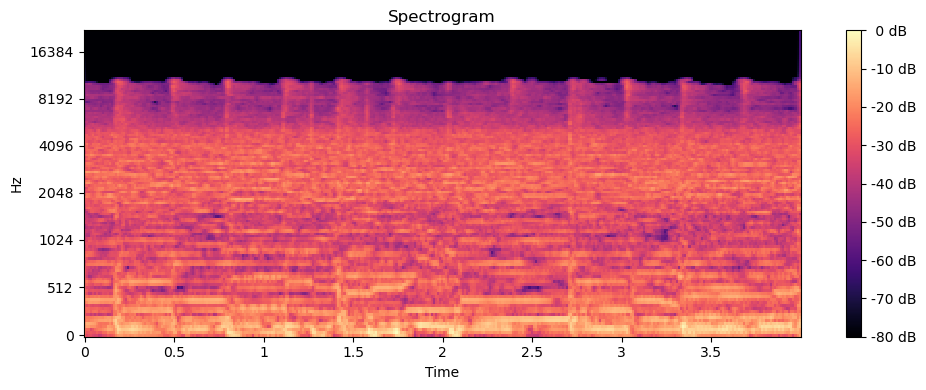

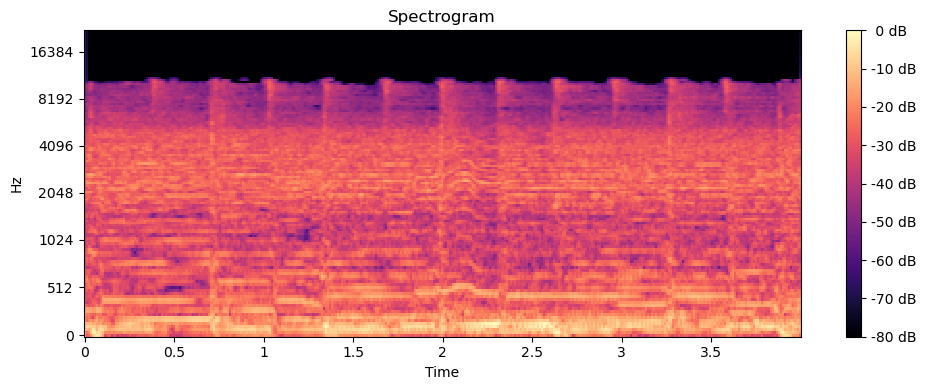

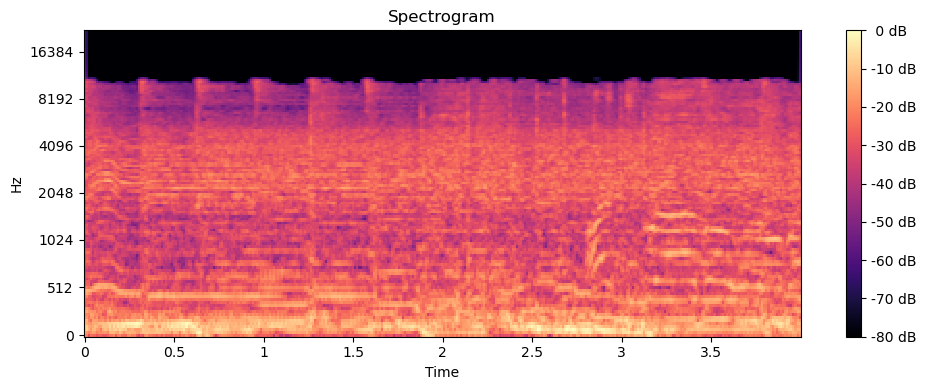

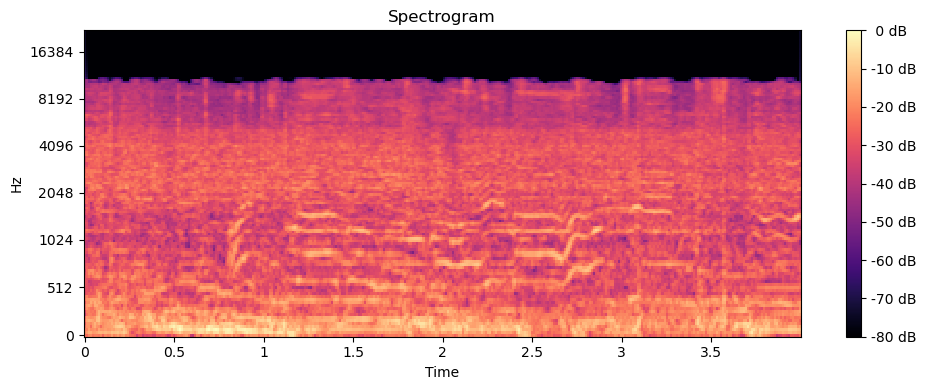

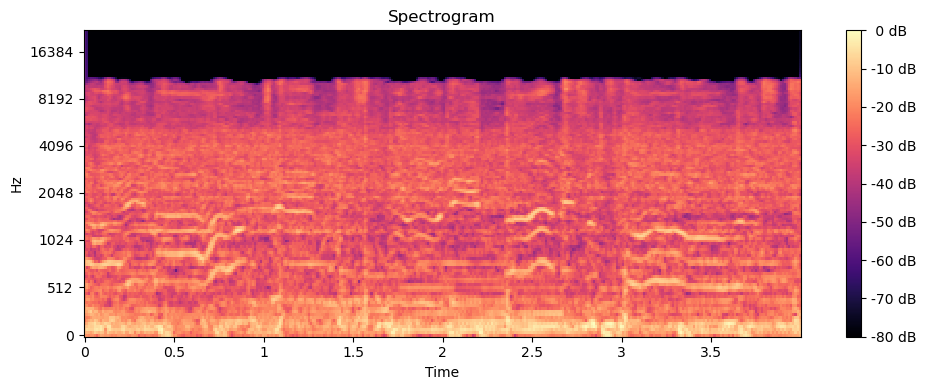

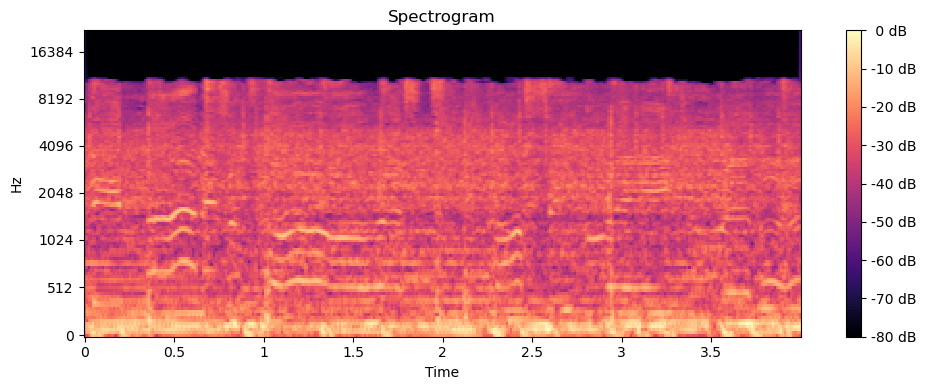

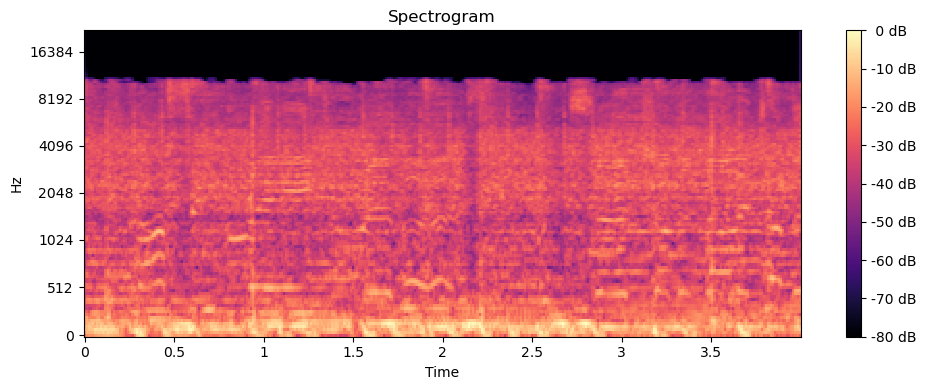

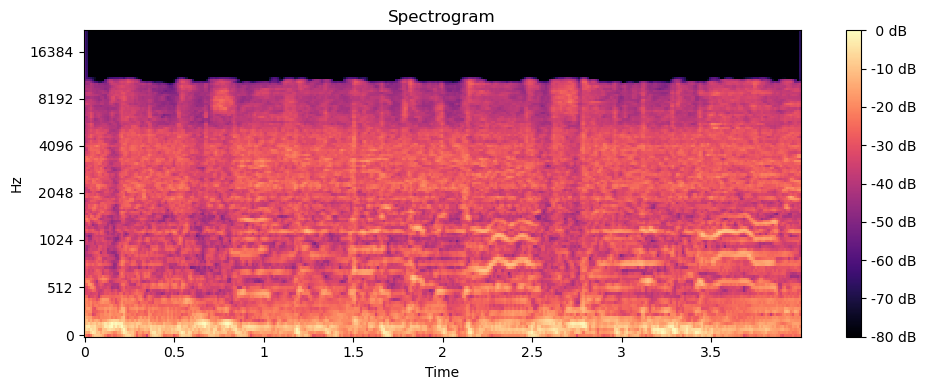

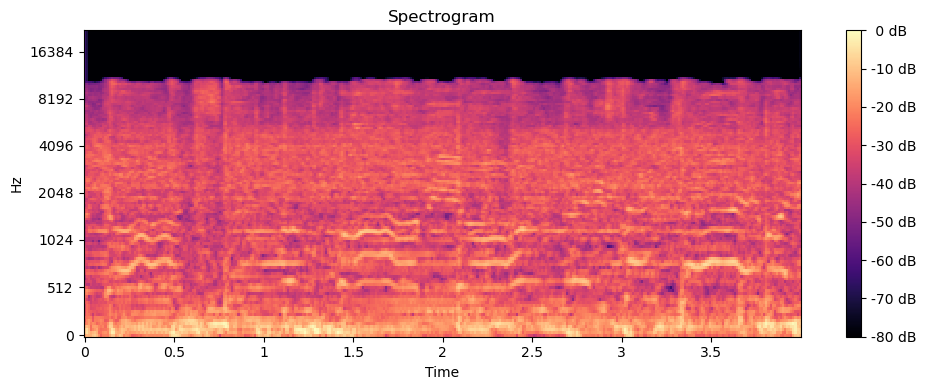

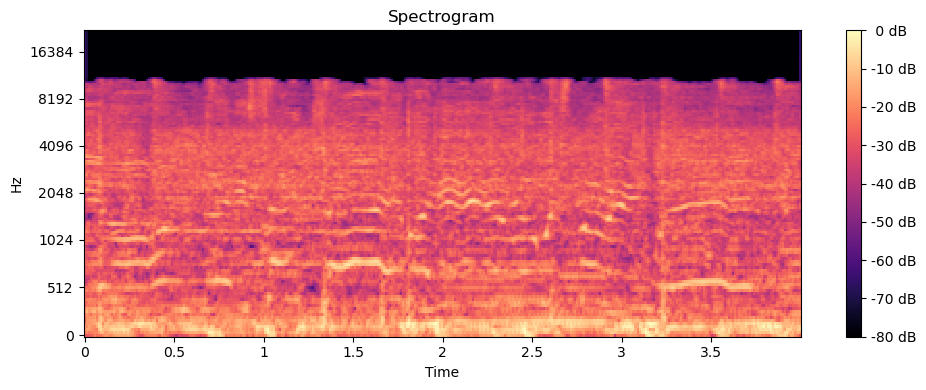

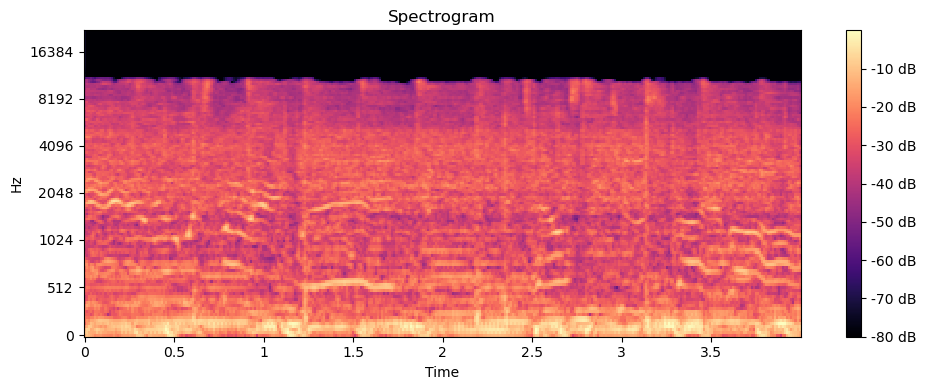

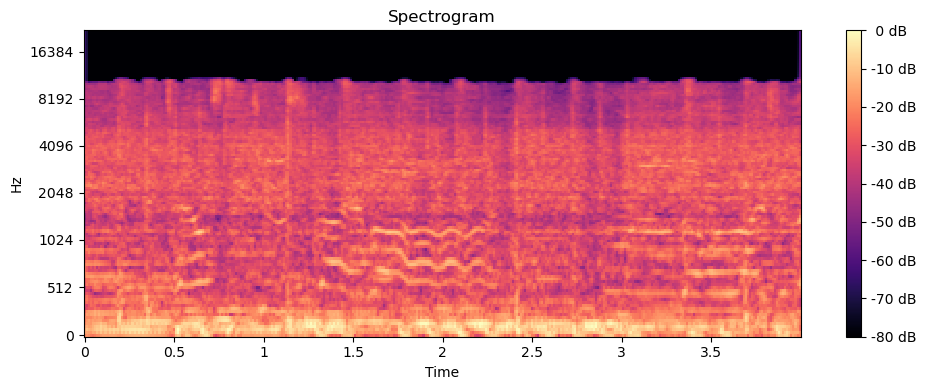

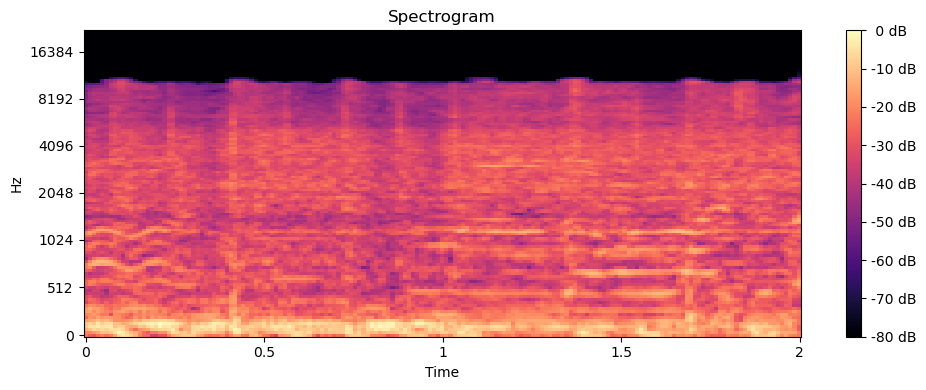

In [63]:
plot_melspectrogram_chunks(y,sr)

In [64]:
128*345

44160

In [65]:
210*210

44100

## Data Preprocessing

In [67]:
# data preprocessing

data_dir = "genres_original"
classes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [68]:
from tensorflow.image import resize
#Load and preprocess audio data
def load_and_preprocess_data(data_dir,classes,target_shape=(150,150)):
    data=[]
    labels=[]

    for i_class,class_name in enumerate(classes):
        class_dir = os.path.join(data_dir,class_name)
        print("Processing--",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir,filename)
                audio_data,sample_rate = librosa.load(file_path,sr=None)
                #Performing Preprocessing
                #define the duration of each chunk and overlap
                chunk_duration = 4
                overlap_duration = 2

                #Convert duration to sample
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate

                #Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data)-chunk_samples)/(chunk_samples-overlap_samples)))+1

                #iterate over each chunks
                for i in range(num_chunks):
                    #Calculate start and end indices of the chunk
                    start = i*(chunk_samples-overlap_samples)
                    end = start+chunk_samples
                    #Extract the chunk audio
                    chunk = audio_data[start:end]
                    #Melspectrogram part
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sample_rate)
                    #Resize matrix based on provided target shape
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram,axis=-1),target_shape)
                    #Append data to list
                    data.append(mel_spectrogram)
                    labels.append(i_class)
    #Return
    return np.array(data),np.array(labels)

In [69]:
data,labels = load_and_preprocess_data(data_dir,classes)

Processing-- blues
Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- jazz
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


In [70]:
data.shape

(14975, 150, 150, 1)

In [71]:
labels.shape

(14975,)

In [72]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels,num_classes = len(classes)) # Converting labels to one-hot encoding
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [73]:
labels.shape

(14975, 10)

## Splitting the dataset int training and test set

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

# Building a model

In [77]:
model = tf.keras.models.Sequential()

In [78]:

X_train[0].shape

(150, 150, 1)

In [79]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\Nemo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [81]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [82]:
model.add(Dropout(0.3))

In [83]:

model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [84]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [85]:
model.add(Dropout(0.3))

In [86]:
model.add(Flatten())

In [87]:

model.add(Dense(units=1200,activation='relu'))

In [88]:
model.add(Dropout(0.45))

In [89]:
#Output layer
model.add(Dense(units=len(classes),activation='softmax'))

In [90]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 148, 148, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 74, 74, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 17, 17, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1200)                │       2,458,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          12,010 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 7,182,458 (27.40 MB)

 Trainable params: 7,182,458 (27.40 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
#Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [92]:
#Training Model
training_history = model.fit(X_train,Y_train,epochs=30,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 443s 1s/step - accuracy: 0.1922 - loss: 2.1549 - val_accuracy: 0.3977 - val_loss: 1.6940
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 505s 1s/step - accuracy: 0.4235 - loss: 1.5970 - val_accuracy: 0.5619 - val_loss: 1.2547
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 474s 1s/step - accuracy: 0.5760 - loss: 1.2071 - val_accuracy: 0.6097 - val_loss: 1.1001
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 440s 1s/step - accuracy: 0.6347 - loss: 1.0412 - val_accuracy: 0.6912 - val_loss: 0.8972
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 442s 1s/step - accuracy: 0.7119 - loss: 0.8328 - val_accuracy: 0.7309 - val_loss: 0.8132
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 438s 1s/step - accuracy: 0.7530 - loss: 0.7293 - val_accuracy: 0.7606 - val_loss: 0.7049
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 441s 1s/step - accuracy: 0.8016 - loss: 0.5930 - val_accuracy: 0.8010 - val_loss: 0.6116
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 443s 1s/step - accuracy: 0.8317 - loss: 0.4934 - val_accu

In [93]:
# model.save("Trained_model.keras") #Mac
model.save("Trained_model.h5") #Windows

In [94]:
training_history.history

{'accuracy': [0.25383973121643066,
  0.4687812924385071,
  0.5914857983589172,
  0.6553422212600708,
  0.7171118259429932,
  0.7601001858711243,
  0.7987478971481323,
  0.8309682607650757,
  0.8522537350654602,
  0.8753756284713745,
  0.898330569267273,
  0.9130216836929321,
  0.9214524030685425,
  0.9323872923851013,
  0.9437395930290222,
  0.9471619129180908,
  0.9556761384010315,
  0.9613522291183472,
  0.9645242094993591,
  0.9679465889930725,
  0.9651919603347778,
  0.9737061858177185,
  0.9757094979286194,
  0.9782971739768982,
  0.9788814783096313,
  0.9727879762649536,
  0.9823873043060303,
  0.9794657826423645,
  0.9828881621360779,
  0.9829716086387634],
 'loss': [2.0184683799743652,
  1.4865164756774902,
  1.1677892208099365,
  0.9880622029304504,
  0.8232289552688599,
  0.703410804271698,
  0.5919212102890015,
  0.4936163127422333,
  0.4311702847480774,
  0.3620007634162903,
  0.30159690976142883,
  0.2586379051208496,
  0.22692139446735382,
  0.19600656628608704,
  0.16398

In [95]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [96]:

X_train

array([[[[3.2394952e+02],
         [1.3065462e+02],
         [6.7034540e+00],
         ...,
         [4.3478956e+00],
         [3.3688255e+01],
         [7.3319199e+01]],

        [[6.4282861e+02],
         [3.4481317e+02],
         [2.4032494e+01],
         ...,
         [5.4154781e+01],
         [1.8837805e+02],
         [2.7204626e+02]],

        [[4.7228046e+02],
         [2.4064510e+02],
         [2.2244192e+01],
         ...,
         [1.0659833e+02],
         [3.5626904e+02],
         [2.6705249e+02]],

        ...,

        [[2.5943064e-03],
         [5.4452824e-04],
         [3.3627577e-05],
         ...,
         [2.4564300e-05],
         [3.0641881e-05],
         [6.9904629e-05]],

        [[2.5715523e-03],
         [5.2518921e-04],
         [2.9510522e-06],
         ...,
         [2.1084190e-06],
         [6.1495894e-06],
         [5.3449046e-05]],

        [[2.5453656e-03],
         [5.1769981e-04],
         [7.9050622e-08],
         ...,
         [7.0884823e-08],
        

In [97]:
#Reloading model variable
model = tf.keras.models.load_model("Trained_model.h5")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 148, 148, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 74, 74, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 17, 17, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1200)                │       2,458,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          12,010 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 7,182,460 (27.40 MB)

 Trainable params: 7,182,458 (27.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [98]:
#Reloading Training history
import json
with open("training_hist.json",'r') as json_file:
    training_history_data = json.load(json_file)

In [99]:
training_history_data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

# Model Evaluation

In [101]:
#Model evaluation on Training set
train_loss,train_accuracy = model.evaluate(X_train,Y_train)

375/375 ━━━━━━━━━━━━━━━━━━━━ 84s 224ms/step - accuracy: 0.9945 - loss: 0.0173


In [102]:

train_loss,train_accuracy

(0.015410165302455425, 0.9951586127281189)

In [103]:
#Model evaluation on Validation set
val_loss,val_accuracy = model.evaluate(X_test,Y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 223ms/step - accuracy: 0.9166 - loss: 0.3528


In [104]:
val_loss,val_accuracy

(0.3825092613697052, 0.9151920080184937)

# Accuracy and Loss visualization

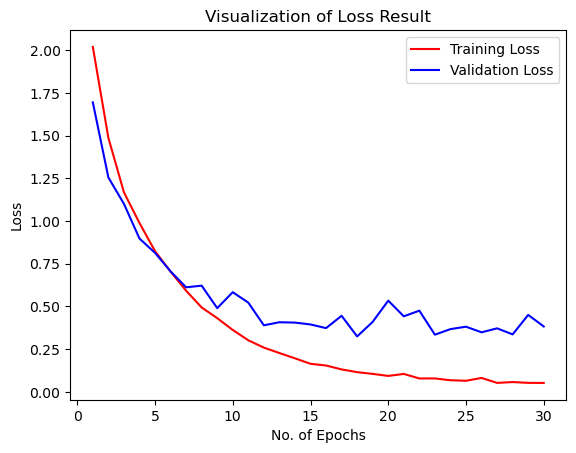

In [106]:
#Visualization of Loss
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['loss'],label="Training Loss",color='red')
plt.plot(epochs,training_history_data['val_loss'],label="Validation Loss",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

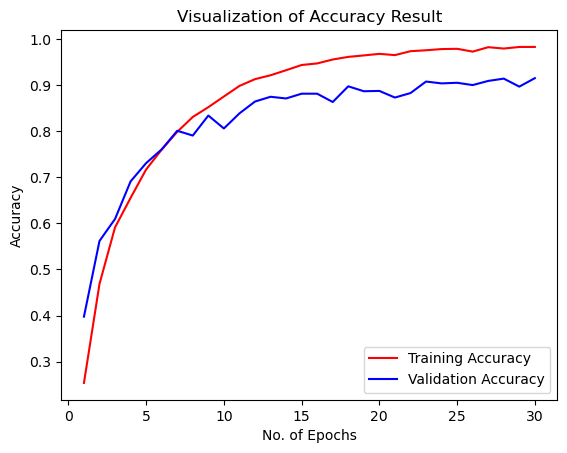

In [107]:
#Visualization of Accuracy
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['accuracy'],label="Training Accuracy",color='red')
plt.plot(epochs,training_history_data['val_accuracy'],label="Validation Accuracy",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

# Precision,Recall,Confusion Matrix - Model Evaluation-II

In [109]:
X_test.shape

(2995, 150, 150, 1)

In [110]:
y_pred = model.predict(X_test)
y_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 235ms/step


array([[1.7914840e-06, 1.2043621e-07, 3.1013963e-06, ..., 9.9648380e-01,
        1.0680549e-06, 2.3670820e-05],
       [1.6230594e-09, 1.6667426e-16, 2.2748777e-14, ..., 3.6765472e-17,
        3.6257870e-13, 1.0346401e-07],
       [1.1236250e-10, 4.7704261e-13, 8.3915791e-12, ..., 2.6468905e-09,
        2.3202120e-16, 3.0275511e-02],
       ...,
       [1.0000000e+00, 2.2434646e-23, 5.8594378e-14, ..., 2.0931044e-21,
        4.9514874e-18, 2.1273475e-14],
       [4.6241534e-05, 9.9800402e-01, 4.5061195e-05, ..., 3.3508314e-04,
        5.3273566e-04, 6.7868430e-05],
       [6.8330510e-06, 2.6842905e-08, 1.9834850e-05, ..., 8.4040388e-03,
        1.3330305e-03, 2.2791440e-03]], dtype=float32)

In [111]:
y_pred.shape

(2995, 10)

In [112]:
predicted_categories = np.argmax(y_pred,axis=1)
predicted_categories

array([7, 6, 6, ..., 0, 1, 4], dtype=int64)

In [113]:

Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [114]:

Y_test.shape

(2995, 10)

In [115]:
true_categories = np.argmax(Y_test,axis=1)
true_categories

array([7, 6, 6, ..., 0, 1, 4], dtype=int64)

In [116]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [117]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
# Precision Recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.91      0.95      0.93       302
   classical       0.94      0.97      0.95       298
     country       0.92      0.77      0.84       317
       disco       0.89      0.94      0.91       312
      hiphop       0.92      0.97      0.95       277
        jazz       0.94      0.94      0.94       311
       metal       0.99      0.94      0.96       302
         pop       0.92      0.89      0.91       289
      reggae       0.91      0.94      0.93       296
        rock       0.81      0.85      0.83       291

    accuracy                           0.92      2995
   macro avg       0.92      0.92      0.91      2995
weighted avg       0.92      0.92      0.91      2995



# Confusion Matrix Visualization

In [119]:
cm

array([[287,   0,   5,   1,   0,   4,   0,   2,   1,   2],
       [  1, 289,   1,   0,   0,   5,   0,   0,   0,   2],
       [ 13,   2, 245,   7,   0,   5,   1,   5,   7,  32],
       [  2,   2,   0, 294,   3,   0,   0,   6,   3,   2],
       [  0,   0,   1,   2, 268,   1,   2,   0,   2,   1],
       [  3,   9,   2,   0,   1, 292,   0,   0,   3,   1],
       [  0,   0,   1,   2,   5,   1, 283,   1,   0,   9],
       [  3,   2,   3,   2,   7,   1,   0, 258,   8,   5],
       [  2,   0,   1,   3,   3,   1,   0,   3, 278,   5],
       [  3,   4,   6,  21,   3,   0,   0,   4,   3, 247]], dtype=int64)

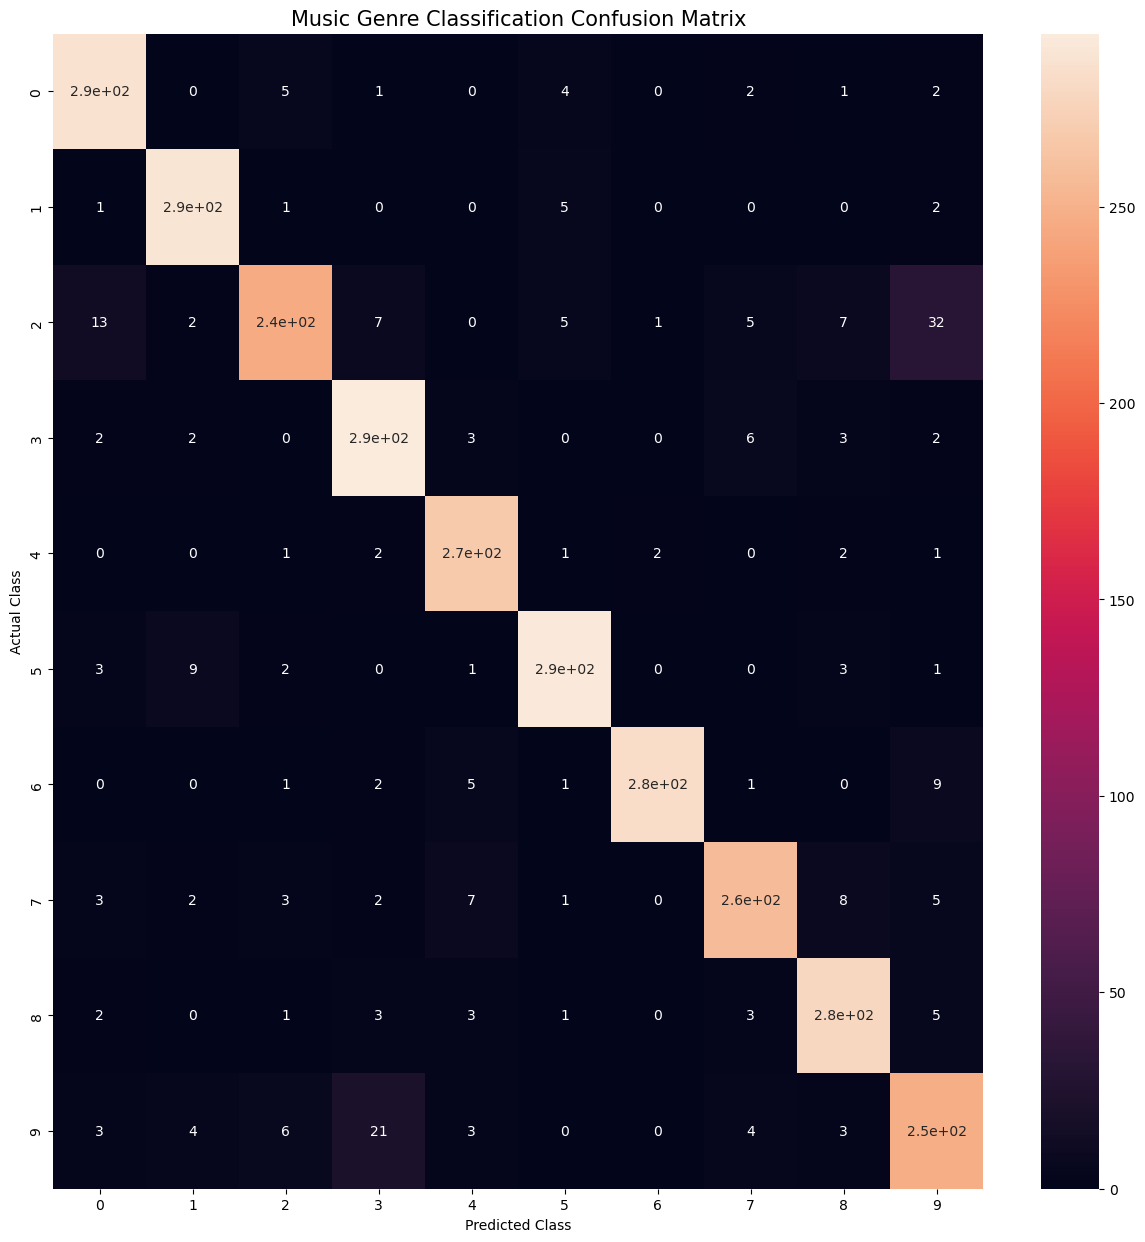

In [120]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Music Genre Classification Confusion Matrix",fontsize=15)
plt.show()